# model_M1

In [1]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dir_name_train_malignant = 'data/Train/malignant'
dir_name_train_squamous_cell_carcinoma = 'data/Train/squamous cell carcinoma'
dir_name_train_vascular_lesion = 'data/Train/vascular lesion'

In [5]:
def plot_images(item_dir, n=10):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [6]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for nevus type disease:

 ====== Images in:  data/Train/malignant
images_count:	126
min_width:	224
max_width:	224
min_height:	224
max_height:	224



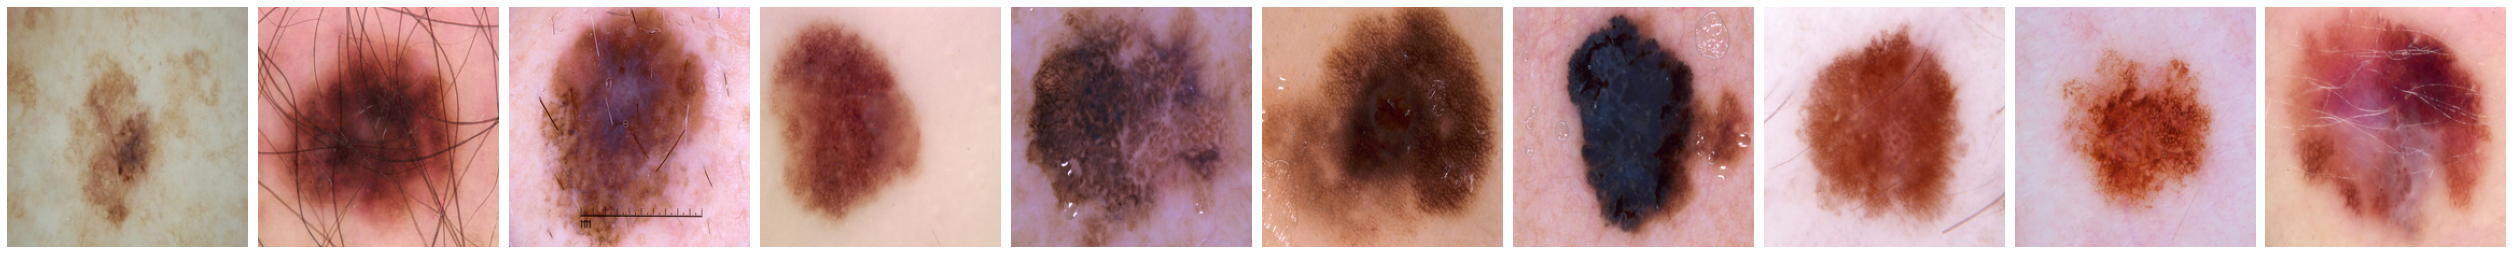

In [7]:
print("")
print("Trainned data for nevus type disease:")
print("")
Images_details(dir_name_train_malignant)
print("")
plot_images(dir_name_train_malignant, 10)


Trainned data for nevus type disease:

 ====== Images in:  data/Train/squamous cell carcinoma
images_count:	102
min_width:	600
max_width:	600
min_height:	450
max_height:	450



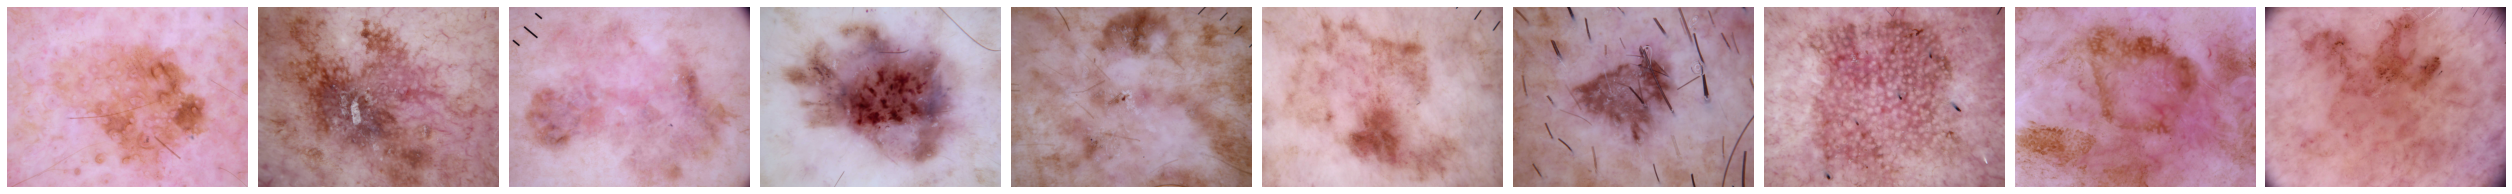

In [8]:
print("")
print("Trainned data for nevus type disease:")
print("")
Images_details(dir_name_train_squamous_cell_carcinoma)
print("")
plot_images(dir_name_train_squamous_cell_carcinoma, 10)


Trainned data for nevus type disease:

 ====== Images in:  data/Train/vascular lesion
images_count:	112
min_width:	600
max_width:	600
min_height:	450
max_height:	450



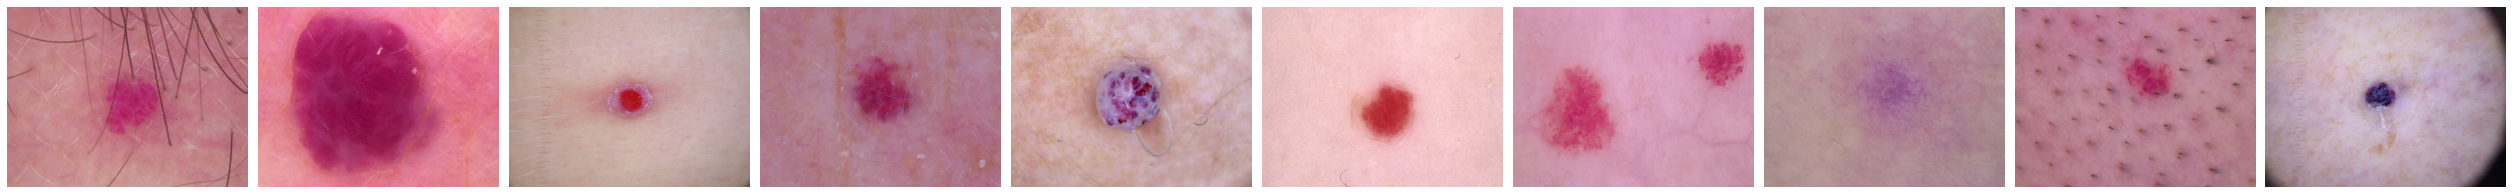

In [9]:
print("")
print("Trainned data for nevus type disease:")
print("")
Images_details(dir_name_train_vascular_lesion)
print("")
plot_images(dir_name_train_vascular_lesion, 10)

In [10]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(250,250,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [11]:
Classifier.add(Dense(3, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('data/Train',target_size=(250,250),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('data/Test',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 340 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


In [14]:
img_dims = 150
epochs = 5
batch_size = 32

In [15]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/5
10/10 [==============================] - 27s 2s/step - loss: 70.6368 - accuracy: 0.3084 - val_loss: 27.2402 - val_accuracy: 0.2969
Epoch 2/5
10/10 [==============================] - 18s 2s/step - loss: 14.0771 - accuracy: 0.5130 - val_loss: 5.2705 - val_accuracy: 0.5781
Epoch 3/5
10/10 [==============================] - 19s 2s/step - loss: 7.2306 - accuracy: 0.4805 - val_loss: 1.1029 - val_accuracy: 0.6719
Epoch 4/5
10/10 [==============================] - 19s 2s/step - loss: 2.4116 - accuracy: 0.5906 - val_loss: 3.4957 - val_accuracy: 0.7031
Epoch 5/5
10/10 [==============================] - 18s 2s/step - loss: 1.0008 - accuracy: 0.7662 - val_loss: 0.2822 - val_accuracy: 0.9062


In [16]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

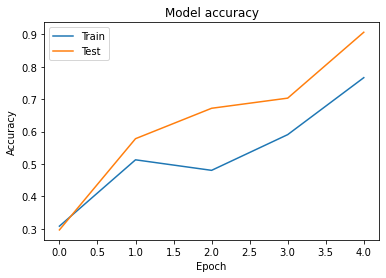

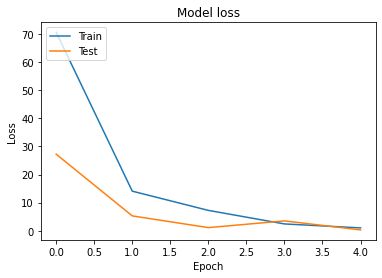

In [17]:
graph()